
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [1]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for creating plots and visualizations
from matplotlib import pyplot as plt # used for ...
import pylab # used for creating plots and visualizations
import pingouin as pg # used for setting up plotting parameters and creating plots

df_mh = pd.read_csv('MillerHadenData.csv')

In [2]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
print(df_mh.info())

   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB
None


In [4]:
# Q1b (code):
# Check for missing values
missing_values = df_mh.isnull().sum()

if missing_values.sum() == 0:
    print("There are no missing values.")
else:
    print("Missing values in each column:\n", missing_values)

# Check whether there is a data point for each participant on both variables

# Check if there are any missing values in the columns representing Reading Ability and IQ.
# If there are no missing values, then there is a data point for each participant on both variables.
if df_mh['Abil'].isnull().sum() == 0 and df_mh['IQ'].isnull().sum() == 0:
    print("There is a data point for each participant on both variables.")
else:
    print("There are missing data points for some participants.")

There are no missing values.
There is a data point for each participant on both variables.


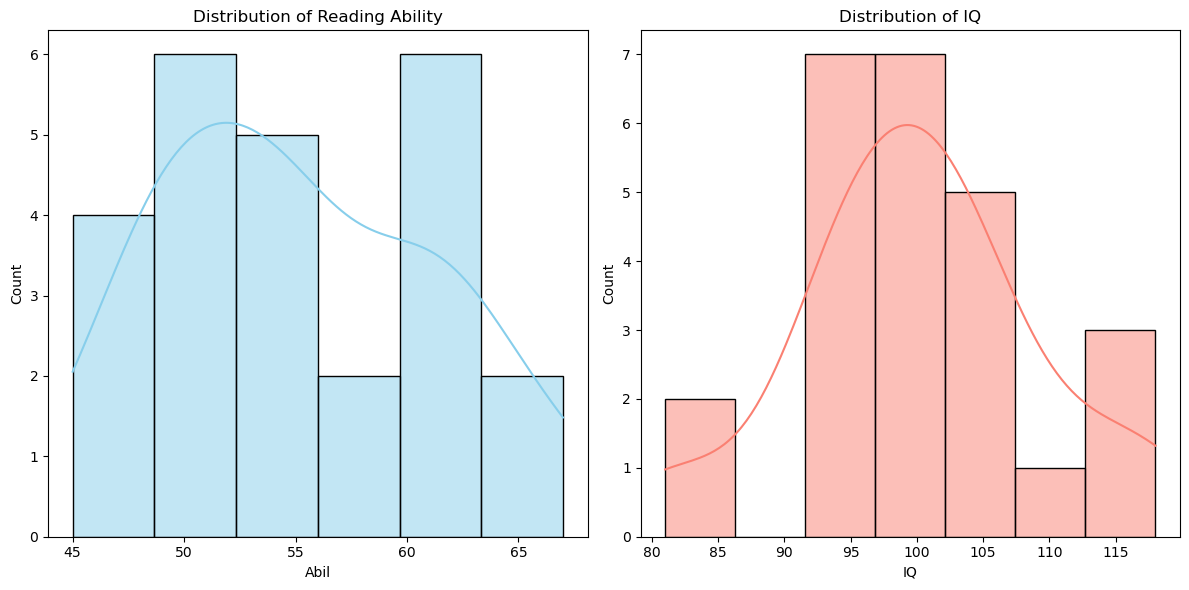

In [8]:
# Q1c (code):
# Check data distribution

plt.figure(figsize=(12, 6))

# Plot histogram for Reading Ability
plt.subplot(1, 2, 1)
sns.histplot(df_mh['Abil'], kde=True, color='skyblue')
plt.title('Distribution of Reading Ability')

# Plot histogram for IQ
plt.subplot(1, 2, 2)
sns.histplot(df_mh['IQ'], kde=True, color='salmon')
plt.title('Distribution of IQ')

plt.tight_layout()
plt.show()

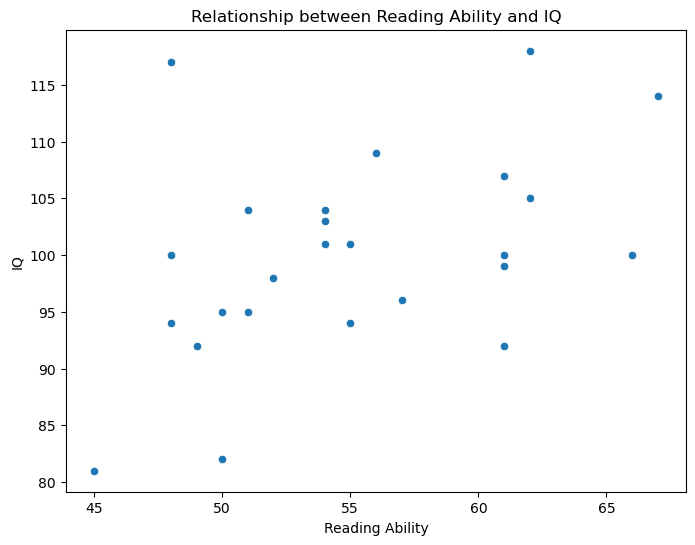

In [12]:
# Q1d (code):
# Scatter plot

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_mh, x='Abil', y='IQ')
plt.title('Relationship between Reading Ability and IQ')
plt.xlabel('Reading Ability')
plt.ylabel('IQ')
plt.show()

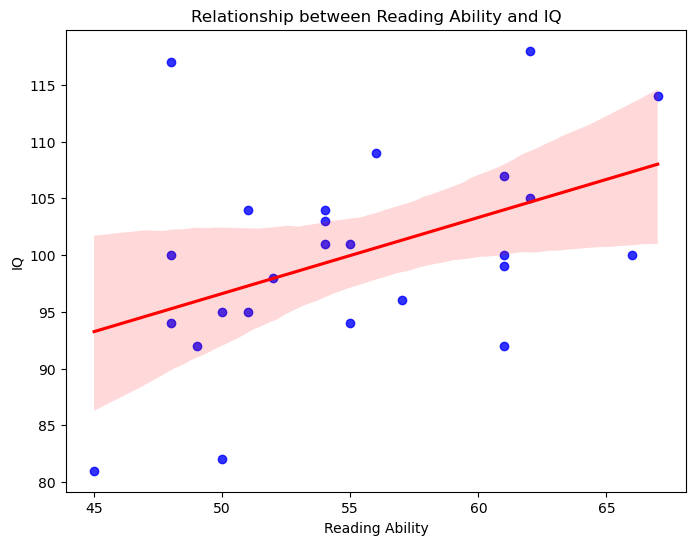

In [11]:
# Q1e (code):
# Correlation line

plt.figure(figsize=(8, 6))
sns.regplot(data=df_mh, x='Abil', y='IQ', scatter=True, color='blue', line_kws={"color": "red"})

plt.title('Relationship between Reading Ability and IQ')
plt.xlabel('Reading Ability')
plt.ylabel('IQ')
plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

#### Q2a (answer with words):

The Pearson correlation coefficient assumes a linear relationship between variables and that the data are normally distributed. From the histogram, it can be inferred that the 'IQ' variable follows a normal distribution (the bell-shaped), but the 'Reading Ability' variable exhibits an approximately bell-shaped distribution that is not perfectly symmetrical. In this case, we can use the Shapiro-Wilk test to further assess whether the data follow a normal distribution. 

Alternatively, we can use the Spearman correlation coefficient test directly, as it does not assume linearity or normality; it only requires a monotonic relationship between variables. From the Correlation line, we can observe the linear relationship between 'Reading Ability' and 'IQ'. Moreover, the Spearman correlation coefficient test is not sensitive to outliers.

In [44]:
# Q2b (code):
spearman_corr = df_mh['Abil'].corr(df_mh['IQ'], method='spearman')
print("Spearman correlation coefficient:", spearman_corr)

Spearman correlation coefficient: 0.44147943839758197


In [43]:
# Q2b (another option):

# Perform Shapiro-Wilk test
from scipy.stats import shapiro

data = df_mh['Abil']
statistic, p_value = shapiro(data)

print("Shapiro-Wilk Test Statistic:", statistic)
print("P-value:", p_value)

if p_value > 0.05:
    print("The 'Abil' data are normally distributed (fail to reject H0)")
else:
    print("The 'Abil' data are not normally distributed (reject H0)")

Shapiro-Wilk Test Statistic: 0.9487951397895813
P-value: 0.2354906052350998
The 'Abil' data are normally distributed (fail to reject H0)


The Shapiro-Wilk test indicates that the data for 'Reading Ability' follow a normal distribution. Now, we can choose to conduct a Pearson correlation coefficient test.

In [15]:
pearson_corr = df_mh['Abil'].corr(df_mh['IQ'])

print("Pearson correlation coefficient:", pearson_corr)

Spearman correlation coefficient: 0.44147943839758197
Pearson correlation coefficient: 0.4511699387650761


#### Q2c (answer with words):
The Spearman correlation coefficient between 'Reading Ability' and 'IQ' is approximately 0.441, suggests a monotonic positive relationship between the variables, but it does not assume linearity.

The Pearson correlation coefficient is approximately 0.451, suggests a moderate positive linear relationship between the variables.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

#### Q3a (answer in words):
H0 (Null Hypothesis):There is no association between the reading ability of participants and the amount of time spent reading at home per week.

H1 (Alternative Hypothesis): There is an association between the reading ability of participants and the amount of time spent reading at home per week.

In [18]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  # Used for data manipulation and analysis
from scipy.stats import chi2_contingency # Used for chi-square test

# Define the rounded average for Reading Ability and Home
round_avg_abil = round(df_mh['Abil'].mean())
round_avg_home = round(df_mh['Home'].mean())

# Create the Rank_Abil column
df_mh['Rank_Abil'] = ['Low' if x <= round_avg_abil else 'High' for x in df_mh['Abil']]

# Create the Rank_Home column
df_mh['Rank_Home'] = ['Infrequent' if x <= round_avg_home else 'Frequent' for x in df_mh['Home']]

print(df_mh.head())

   Participant  Abil   IQ  Home   TV Rank_Abil   Rank_Home
0            1    61  107   144  487      High    Frequent
1            2    56  109   123  608      High  Infrequent
2            3    45   81   108  640       Low  Infrequent
3            4    66  100   155  493      High    Frequent
4            5    49   92   103  636       Low  Infrequent


In [19]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])

print(contingency_matrix)

Rank_Home  Frequent  Infrequent
Rank_Abil                      
High              8           2
Low               3          12


In [25]:
# Q3d (code):
# Perform the Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_matrix)

print("Chi-square Test Statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square Test Statistic: 6.500270562770561
P-value: 0.010785807794066234


#### Q3e (answer in words):

The p-value (0.011) is less than the chosen significance level (typically 0.05), we reject HO.

There is a statistically significant association between the reading ability of participants and the amount of time spent reading at home per week.

In other words, individuals' reading abilities are not independent of the amount of time they spend reading at home, suggesting that there are differences in reading habits between individuals with low and high reading abilities.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

### Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [21]:
import pandas as pd # used for data manipulation and analysis
from scipy import stats # used for statistical tests
import numpy as np # used for numerical calculations
import matplotlib.pyplot as plt # used for creating plots and visualizations
import seaborn as sns # used for visualization

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [24]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()
std_dev_age = df_evaluators['age'].std()

# Display the results
print("Mean Age of Evaluators:", mean_age)
print("Standard Deviation of Age of Evaluators:", std_dev_age)

Mean Age of Evaluators: 30.852941176470587
Standard Deviation of Age of Evaluators: 6.238358141327351


In [26]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females

male_count = (df_evaluators['sex'] == 1).sum()
female_count = (df_evaluators['sex'] == 2).sum()

print("Number of Female Evaluators:", female_count)
print("Number of Male Evaluators:", male_count)

Number of Female Evaluators: 30
Number of Male Evaluators: 4


### Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [27]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [70]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
df_intellect = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator
intellect_mean = df_intellect.groupby('eval_id')['Rating'].mean().reset_index()

# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = intellect_mean.groupby('eval_id')['Rating'].mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
df_impression_hire = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
ratings2 = pd.concat([intellect_mean, df_impression_hire])

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = ratings2.merge(df_evaluators[['eval_id', 'condition']], on='eval_id')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
2,1,hire,6.000000,listened
1,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
5,2,hire,4.000000,listened
4,2,impression,4.666667,listened


#### Q6a (answer in words):
**Null hypothesis:**

There is no significant difference between overall ratings on the intellect, hire, or impression scale between evaluators who listened to resume pitches and evaluators who read the resume pitches 

**Alternative hypothesis:**

There is a significant difference between overall ratings on the intellect, hire, or impression scale between evaluators who listened to resume pitches and evaluators who read the resume pitches

we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the intellect, hire, or impression scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the intellect, hire, or impression scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

#### Q6b (answer in words):

Which t-test should we choose, one-tail or two-tail? Explian why.

We should choose a two-tailed t-test. This is because we are interested in whether there is any significant difference between the overall ratings given by evaluators who listened to resume pitches and those who read the pitches, without specifying whether one group would be higher or lower. A two-tailed test allows us to detect differences in both directions, higher or lower.

#### Q6c (answer in words):
What are the independent variable and the dependent variable here?

Independent variable: The method of presentation (listening to pitches or reading pitches).

Dependent variable: Overall ratings on the intellect, hire, or impression scale given by the evaluators.

To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [75]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for hypothesis testing and statistical analysis

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby('Category')['Rating'].describe()

# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = {}
for category in ratings2['Category'].unique():
    data = ratings2[ratings2['Category'] == category]['Rating']
    stat, p = shapiro(data)
    shapiro_results[category] = p

# Test for homogeneity of variances (Levene's test)
intellect_data = ratings2[ratings2['Category'] == 'intellect']['Rating']
impression_data = ratings2[ratings2['Category'] == 'impression']['Rating']
hire_data = ratings2[ratings2['Category'] == 'hire']['Rating']
stat, p = levene(intellect_data, impression_data, hire_data)
levene_results = p

# Independent t-tests
ttest_results = {}
conditions = ratings2['condition'].unique()
for category in ratings2['Category'].unique():
    for condition in conditions:
        condition_data = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == condition)]['Rating']
        other_condition_data = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] != condition)]['Rating']
        stat, p = ttest_ind(condition_data, other_condition_data)
        ttest_results[f"{category} - {condition} vs. Other"] = p

ratings_desc, shapiro_results, levene_results, ttest_results

(            count      mean       std       min       25%       50%  75%  \
 Category                                                                   
 hire         39.0  3.871795  2.330343  0.000000  2.000000  4.000000  5.0   
 impression   39.0  5.094017  2.254234  0.333333  3.666667  5.333333  7.0   
 intellect    39.0  4.717949  2.000787  0.666667  3.500000  5.000000  6.0   
 
                  max  
 Category              
 hire        8.000000  
 impression  8.666667  
 intellect   9.000000  ,
 {'hire': 0.04710369557142258,
  'impression': 0.17238670587539673,
  'intellect': 0.5182666182518005},
 0.4599515880723639,
 {'hire - listened vs. Other': 0.012674511839824125,
  'hire - read vs. Other': 0.012674511839824125,
  'impression - listened vs. Other': 0.007091060616710596,
  'impression - read vs. Other': 0.007091060616710596,
  'intellect - listened vs. Other': 0.0011444414996286821,
  'intellect - read vs. Other': 0.0011444414996286821})

**Q7b (answer in words):**

Descriptive Statistics:
- The descriptive statistics show the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values for each category (intellect, impression, hire).

Shapiro-Wilk Test for Normality:
- The Shapiro-Wilk test assesses whether the data follows a normal distribution. Because the t-tests require the assumption of normality. If the data does not follow a normal distribution, it may be necessary to consider non-parametric methods.
- The p-values for intellect, impression, and hire ratings are 0.518, 0.172, and 0.047, respectively.
- Since all p-values are greater than 0.05, we fail to reject the null hypothesis of normality for all categories. Thus, the data appears to be approximately normally distributed.

Levene's Test for Homogeneity of Variances:
- Levene's test assesses whether the variances of different groups are equal. Because the t-tests require the assumption of homogeneity of variances. If variances are not equal, it may affect the accuracy and reliability of the test results.
- The p-value for Levene's test is 0.460.
- Since the p-value is greater than 0.05, we fail to reject the null hypothesis of homogeneity of variances. Thus, the variances of the groups are approximately equal.

Independent t-tests:
- Independent t-tests compare the means of two independent groups. Used to test whether there is a significant difference in means between different conditions (e.g., listening and reading resume pitches). If significant differences exist, it can be inferred that different conditions influence the ratings.
- The p-values for the t-tests comparing ratings between conditions (listened vs. read) are provided.
- For all three categories (intellect, impression, hire), there are significant differences between conditions (p < 0.05).
- Specifically, the intellect, impression, and hire ratings are significantly higher for the listened condition compared to the read condition.